In [1]:
import sqlite3
import pymongo
import time
import matplotlib.pyplot as plt
import pandas as pd
db_path = 'datasets/vacinacao_covid_df.db'

In [2]:
# Funções CRUD para SQLite
def sqlite_crud_operations():
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Insira uma linha de dados
    start_time = time.time()
    query = """
INSERT INTO vacinacao_covid_df (
    document_id, 
    paciente_id, 
    paciente_idade, 
    paciente_dataNascimento, 
    paciente_enumSexoBiologico, 
    paciente_racaCor_codigo, 
    paciente_racaCor_valor, 
    paciente_endereco_coIbgeMunicipio, 
    paciente_endereco_coPais, 
    paciente_endereco_nmMunicipio, 
    paciente_endereco_nmPais, 
    paciente_endereco_uf, 
    paciente_endereco_cep, 
    paciente_nacionalidade_enumNacionalidade, 
    estabelecimento_valor, 
    estabelecimento_razaoSocial, 
    estalecimento_noFantasia, 
    estabelecimento_municipio_codigo, 
    estabelecimento_municipio_nome, 
    estabelecimento_uf, 
    vacina_grupoAtendimento_codigo, 
    vacina_grupoAtendimento_nome, 
    vacina_categoria_codigo, 
    vacina_categoria_nome, 
    vacina_lote, 
    vacina_fabricante_nome, 
    vacina_fabricante_referencia, 
    vacina_dataAplicacao, 
    vacina_descricao_dose, 
    vacina_codigo, 
    vacina_nome, sistema_origem
) VALUES (
    999999, 'pac_999999', 30, '1990-01-01', 
    'F', 1, 'Branca', 3550308, 
    33, 'São Paulo', 'Brasil', 'SP', 
    '01000-000', 1, '123456', 'Razao Social', 
    'Fantasia', 3550308, 'São Paulo', 'SP', 
    1, 'Saúde', 1, 'Campanha', 
    'Lote1234', 'FabricanteX', 
    'Ref1234', '2023-01-01', 
    '1ª Dose', 'VAC1234', 
    'VacinaX', 'SistemaX'
)
"""
    cursor.execute(query)
    conn.commit()
    insert_time = time.time() - start_time

    # Consultar o banco de dados
    start_time = time.time()
    cursor.execute("SELECT * FROM vacinacao_covid_df WHERE document_id = 999999")
    rows = cursor.fetchall()
    query_time = time.time() - start_time

    # Atualizar uma linha de dados
    start_time = time.time()
    cursor.execute("UPDATE vacinacao_covid_df SET paciente_idade = 31 WHERE document_id = 999999")
    conn.commit()
    update_time = time.time() - start_time

    # Excluir uma linha de dados
    start_time = time.time()
    cursor.execute("DELETE FROM vacinacao_covid_df WHERE document_id = 999999")
    conn.commit()
    delete_time = time.time() - start_time

    # Fechar a conexão
    conn.close()

    return insert_time, query_time, update_time, delete_time

# Funções CRUD para MongoDB Atlas
def mongodb_crud_operations():
    # Definição das variáveis
    usuario = ""
    senha = ""
    nome_cluster = ""
    host = f"{nome_cluster}.74rj5.mongodb.net"
    parametros = f"?retryWrites=true&w=majority&appName={nome_cluster}"

    uri = f"mongodb+srv://{usuario}:{senha}@{host}/{parametros}"
    client = pymongo.MongoClient(uri)
    db = client.test
    collection = db.example_collection

    # Inserir um documento
    start_time = time.time()
    collection.insert_one({"document_id": 999999, "paciente_id": "pac_999999", 
                           "paciente_idade": 30, "paciente_dataNascimento": "1990-01-01", 
                           "paciente_enumSexoBiologico": "F", "paciente_racaCor_codigo": 1, 
                           "paciente_racaCor_valor": "Branca", "paciente_endereco_coIbgeMunicipio": 3550308, 
                           "paciente_endereco_coPais": 33, "paciente_endereco_nmMunicipio": 
                           "São Paulo", "paciente_endereco_nmPais": "Brasil", "paciente_endereco_uf": "SP", 
                           "paciente_endereco_cep": "01000-000", "paciente_nacionalidade_enumNacionalidade": 1, 
                           "estabelecimento_valor": "123456", "estabelecimento_razaoSocial": "Razao Social", 
                           "estalecimento_noFantasia": "Fantasia", "estabelecimento_municipio_codigo": 3550308, 
                           "estabelecimento_municipio_nome": "São Paulo", "estabelecimento_uf": "SP", 
                           "vacina_grupoAtendimento_codigo": 1, "vacina_grupoAtendimento_nome": "Saúde", 
                           "vacina_categoria_codigo": 1, "vacina_categoria_nome": "Campanha", "vacina_lote": 
                           "Lote1234", "vacina_fabricante_nome": "FabricanteX", "vacina_fabricante_referencia": 
                           "Ref1234", "vacina_dataAplicacao": "2023-01-01", "vacina_descricao_dose": 
                           "1ª Dose", "vacina_codigo": "VAC1234", "vacina_nome": "VacinaX", "sistema_origem": "SistemaX"})
    insert_time = time.time() - start_time

    # Consultar a coleção
    start_time = time.time()
    document = collection.find_one({"document_id": 999999})
    query_time = time.time() - start_time

    # Atualizar um documento
    start_time = time.time()
    collection.update_one({"document_id": 999999}, {"$set": {"paciente_idade": 31}})
    update_time = time.time() - start_time

    # Excluir um documento
    start_time = time.time()
    collection.delete_one({"document_id": 999999})
    delete_time = time.time() - start_time

    # Fecha a conexão
    client.close()

    return insert_time, query_time, update_time, delete_time


In [8]:
# Executa operações CRUD e mede o tempo de execução
sqlite_times = sqlite_crud_operations()


In [ ]:
mongodb_times = mongodb_crud_operations()

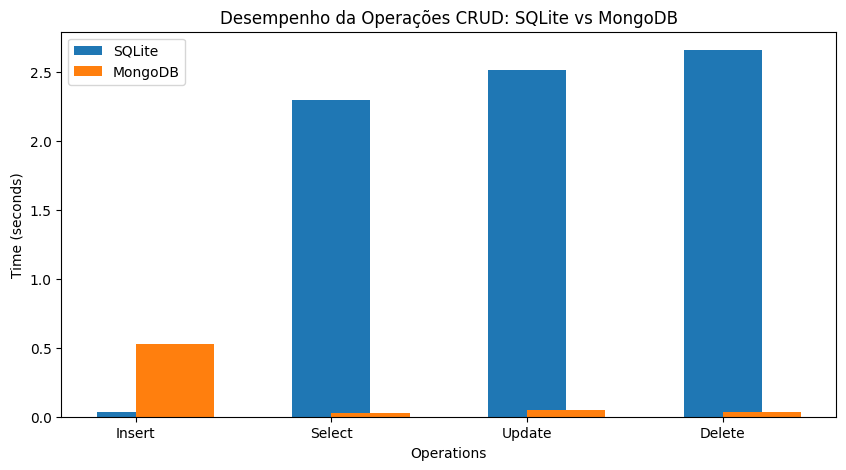

In [18]:

# Plota os tempos de execução
labels = ['Insert', 'Select', 'Update', 'Delete']
x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, sqlite_times, width=0.4, label='SQLite', align='center')
plt.bar(x, mongodb_times, width=0.4, label='MongoDB', align='edge')
plt.xlabel('Operations')
plt.ylabel('Time (seconds)')
plt.title('Desempenho da Operações CRUD: SQLite vs MongoDB')
plt.xticks(x, labels)
plt.legend()
plt.savefig('plots/desempenho_sqlite_mongodb_times.png') 
plt.show()


In [30]:
# Cria uma tabela de tempos de execução
df = pd.DataFrame({
    'Operação CRUD': labels,
    'Time (seconds) SQLite': sqlite_times,
    'Time (seconds) MongoDB': mongodb_times
})

df.to_csv('desempenho_sqlite_mongodb_times.csv', sep=';', index=False)

df['Time (seconds) SQLite'] = df['Time (seconds) SQLite'].round(2)
df['Time (seconds) MongoDB'] = df['Time (seconds) MongoDB'].round(2)


# Exibe a tabela
df

,Operação CRUD,Time (seconds) SQLite,Time (seconds) MongoDB
0,Insert,0.04,0.53
1,Select,2.30,0.03
2,Update,2.51,0.05
3,Delete,2.66,0.03


In [5]:
sqlite_times

(0.051868438720703125,
 23.2080295085907,
 2.7103588581085205,
 2.6794607639312744)

In [7]:
mongodb_times

(0.5288810729980469,
 0.02819061279296875,
 0.04626297950744629,
 0.03142070770263672)